In [1]:
# Importation des librairies

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [2]:
# Fonction d'initialisation

def initialisation(n0, n1, n2) :
    
    W1 = np.random.randn(n1, n0) # Récupère le nombre de variables de X
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1) # Récupère le nombre de variables de X
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2        
    }
    
    return parametres

In [3]:
# Fonction du modèle

def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [4]:
# Fonction des Gradients

def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [5]:
# Fonction de mise à jour

def update(gradients, parametres, learning_rate) :

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2        
    }
    
    return parametres

In [6]:
# Fonction de prédiction

def predict(X, parametres) :
    
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

In [7]:
# Fonction neurone artificiel

def neural_network(X, y, n1, learning_rate = 0.1, n_iter = 1000) :
   
    # Initialisation des paramètres
    n0 = X.shape[0]
    n2 = y.shape[0]
    parametres = initialisation (n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']
        
    # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)


    
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres

In [8]:
# Test

Dimensions de X : (2, 100)
Dimensions de y : (1, 100)


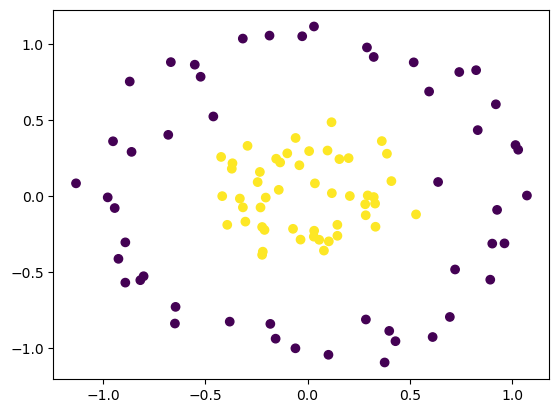

In [9]:
# Préparation du dataset

X, y = make_circles(n_samples = 100, noise = 0.1, factor= 0.3, random_state = 52)
X = X.T
y = y.reshape((1, y.shape[0]))

print('Dimensions de X :', X.shape)
print('Dimensions de y :', y.shape)

plt.scatter(X[0,:], X[1, :], c=y, cmap='viridis')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 1052.75it/s]


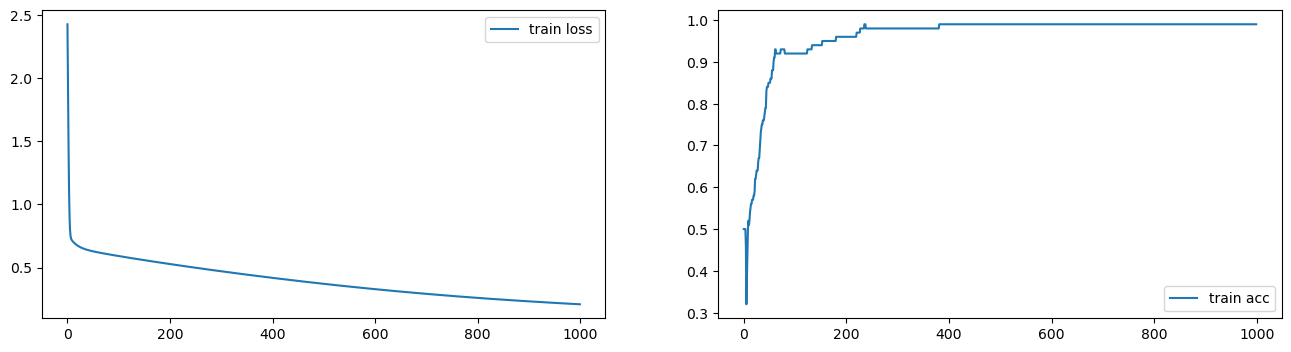

{'W1': array([[-1.64016623, -0.99682596],
        [ 0.03907893, -1.62909999],
        [-0.34608792,  0.22326338],
        [-2.52918354,  3.4685791 ],
        [ 0.01744622,  1.61409492],
        [ 1.78778177,  2.04880812],
        [ 0.88087212, -1.2665487 ],
        [ 0.39573978, -0.99931418],
        [ 0.40265293, -0.16508459],
        [ 0.57413747,  1.96029018],
        [-0.75530928,  0.55228575],
        [ 1.55955528, -2.14188514],
        [ 0.43927508,  0.29250979],
        [ 0.13099063, -0.45743671],
        [ 0.68131256,  0.17039138],
        [-2.53941748, -2.44745033],
        [ 0.61465005,  0.37392016],
        [-0.93885821,  0.8932106 ],
        [ 2.29669427, -1.81749157],
        [ 0.04483413,  2.06834411],
        [-2.97660047,  1.28762843],
        [ 0.62557798,  0.38447321],
        [-0.66206617,  1.11864773],
        [ 1.16543193,  0.55488162],
        [ 0.59976176, -0.13192391],
        [ 0.83724737, -1.06329536],
        [-0.50732908, -1.07284115],
        [-0.33478309, 

In [30]:
neural_network(X, y, n1=64)